# KNN

In [29]:
import pandas as pd 
from sklearn.datasets import load_iris

import matplotlib.pyplot as plt 

from sklearn.model_selection import train_test_split

from sklearn.neighbors import KNeighborsClassifier

from sklearn.metrics import confusion_matrix 
import seaborn as sn

# Load Data

In [2]:
iris = load_iris()

# Show Information

In [3]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [4]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

# Create DataFrame

In [6]:
df = pd.DataFrame(iris.data, columns = iris.feature_names)
df["target"]  = iris.target
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [7]:
## Attach the FLowe NAME to the dataframe

df["flower_name"] = df.target.apply(lambda x : iris.target_names[x])
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,flower_name
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa


# Visualize Data

In [9]:
# split datasets 
df_setosa = df[:50]
df_versicolor = df[50:100]
df_virginica = df[100:]

Text(0, 0.5, 'sepal width (cm)')

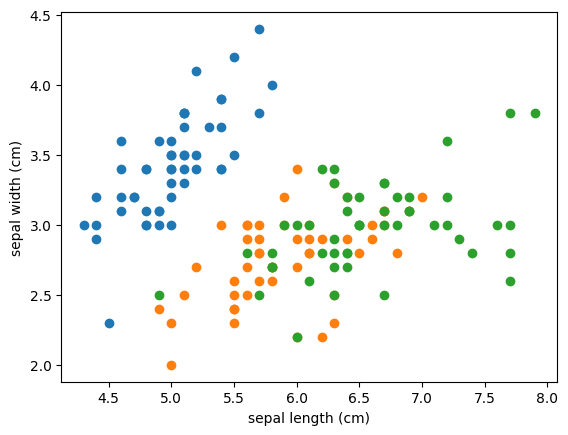

In [14]:
plt.scatter(df_setosa["sepal length (cm)"], df_setosa["sepal width (cm)"])
plt.scatter(df_versicolor["sepal length (cm)"], df_versicolor["sepal width (cm)"])
plt.scatter(df_virginica["sepal length (cm)"], df_virginica["sepal width (cm)"])

plt.xlabel("sepal length (cm)")
plt.ylabel("sepal width (cm)")

Text(0, 0.5, 'pental width (cm)')

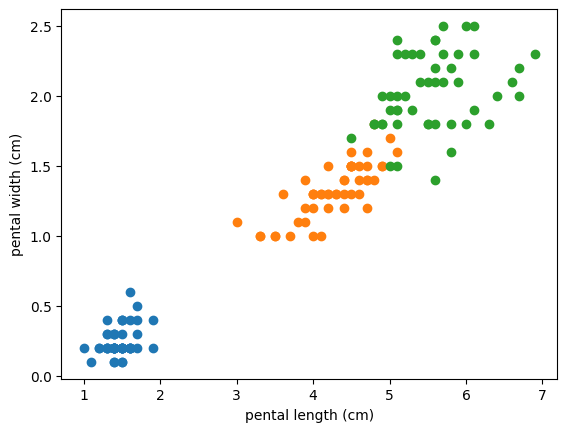

In [16]:
plt.scatter(df_setosa["petal length (cm)"], df_setosa["petal width (cm)"])
plt.scatter(df_versicolor["petal length (cm)"], df_versicolor["petal width (cm)"])
plt.scatter(df_virginica["petal length (cm)"], df_virginica["petal width (cm)"])

plt.xlabel("pental length (cm)")
plt.ylabel("pental width (cm)")

# Split Dataset

In [18]:
X = df.drop(["target", "flower_name"], axis = "columns")
y = df.target 

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.2, random_state= 10)

In [23]:
len(X_train) # 120
len(X_test) # 30

len(y_train) # 120
len(y_test) # 30

30

# Create KNN Model

In [25]:
knn = KNeighborsClassifier(n_neighbors = 10)
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=10)

# Evaluate and score

In [26]:
knn.score(X_test, y_test)

1.0

# Manual Predict 

In [27]:
knn.predict([[ 4.8, 3.0 , 1.5 , 0.3]]) # Class 0

c:\Python\Python3108\lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


array([0])

In [28]:
y_predicted = knn.predict(X_test)

# Confusion Matrix

<AxesSubplot: >

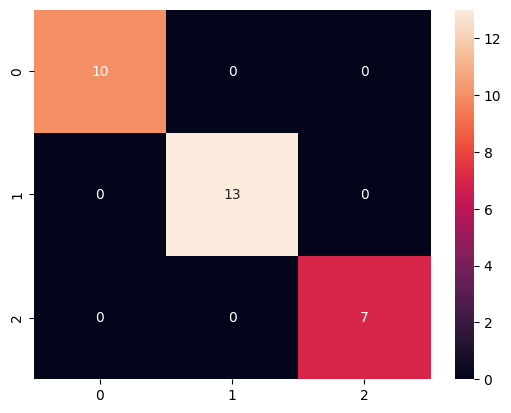

In [30]:
cm = confusion_matrix(y_test, y_predicted)

sn.heatmap(cm ,annot = True)